In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("weather_raw.csv")
weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   name              1095 non-null   str    
 4   tempmax           1095 non-null   float64
 5   tempmin           1095 non-null   float64
 6   temp              1095 non-null   float64
 7   feelslikemax      1095 non-null   float64
 8   feelslikemin      1095 non-null   float64
 9   feelslike         1095 non-null   float64
 10  dew               1095 non-null   float64
 11  humidity          1095 non-null   float64
 12  precip            1095 non-null   float64
 13  precipprob        1095 non-null   int64  
 14  precipcover       1095 non-null   float64
 15  preciptype        423 non-null    str    
 16  snow              1095 non-null   float64
 17  snowde

In [2]:
# 남기고 싶은 열 리스트
selected_cols = [
    'year', 'month', 'date', 'temp', 'humidity',
    'precip', 'snow', 'windspeed', 'winddir',
    'sealevelpressure', 'visibility', 'solarradiation', 'conditions'
]

weather_df = weather_df[selected_cols]

weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   temp              1095 non-null   float64
 4   humidity          1095 non-null   float64
 5   precip            1095 non-null   float64
 6   snow              1095 non-null   float64
 7   windspeed         1095 non-null   float64
 8   winddir           1095 non-null   float64
 9   sealevelpressure  1095 non-null   float64
 10  visibility        1095 non-null   float64
 11  solarradiation    1095 non-null   float64
 12  conditions        1095 non-null   str    
dtypes: float64(9), int64(3), str(1)
memory usage: 111.3 KB


In [3]:
weather_df['conditions'].value_counts()

conditions
Partially cloudy                467
Rain, Partially cloudy          269
Clear                           203
Rain, Overcast                   63
Snow, Rain, Partially cloudy     47
Snow, Partially cloudy           13
Rain                             12
Snow                              9
Snow, Rain                        6
Snow, Rain, Overcast              4
Overcast                          2
Name: count, dtype: int64

In [4]:
weather_df["conditions"].unique()

<StringArray>
[            'Partially cloudy',       'Rain, Partially cloudy',
                        'Clear', 'Snow, Rain, Partially cloudy',
                         'Snow',       'Snow, Partially cloudy',
                   'Snow, Rain',                         'Rain',
         'Snow, Rain, Overcast',                     'Overcast',
               'Rain, Overcast']
Length: 11, dtype: str

In [5]:
weather_df["is_clear"] = weather_df["conditions"].str.contains("Clear").astype(int)
weather_df["is_rain"] = weather_df["conditions"].str.contains("Rain").astype(int)
weather_df["is_snow"] = weather_df["conditions"].str.contains("Snow").astype(int)
weather_df["is_overcast"] = weather_df["conditions"].str.contains("Overcast").astype(int)
weather_df["is_cloudy"] = weather_df["conditions"].str.contains("Partially cloudy").astype(int)

weather_df = weather_df.drop(columns=["conditions"])
weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   int64  
 1   month             1095 non-null   int64  
 2   date              1095 non-null   int64  
 3   temp              1095 non-null   float64
 4   humidity          1095 non-null   float64
 5   precip            1095 non-null   float64
 6   snow              1095 non-null   float64
 7   windspeed         1095 non-null   float64
 8   winddir           1095 non-null   float64
 9   sealevelpressure  1095 non-null   float64
 10  visibility        1095 non-null   float64
 11  solarradiation    1095 non-null   float64
 12  is_clear          1095 non-null   int64  
 13  is_rain           1095 non-null   int64  
 14  is_snow           1095 non-null   int64  
 15  is_overcast       1095 non-null   int64  
 16  is_cloudy         1095 non-null   int64  
dtypes: flo

In [6]:
weather_df.head()

,year,month,date,temp,humidity,precip,snow,windspeed,winddir,sealevelpressure,visibility,solarradiation,is_clear,is_rain,is_snow,is_overcast,is_cloudy
0,2017,1,1,36.9,72.0,0.000,0.0,5.8,131.6,1028.1,2.6,89.6,0,0,0,0,1
1,2017,1,2,41.6,73.6,0.012,0.0,9.3,252.4,1022.6,1.8,83.1,0,1,0,0,1
2,2017,1,3,34.5,63.6,0.000,0.0,10.1,283.9,1024.1,4.3,120.7,1,0,0,0,0
3,2017,1,4,37.3,60.1,0.000,0.0,10.2,318.0,1023.8,5.6,119.9,0,0,0,0,1
4,2017,1,5,38.0,53.5,0.000,0.0,12.6,59.1,1027.0,7.1,69.9,0,0,0,0,1


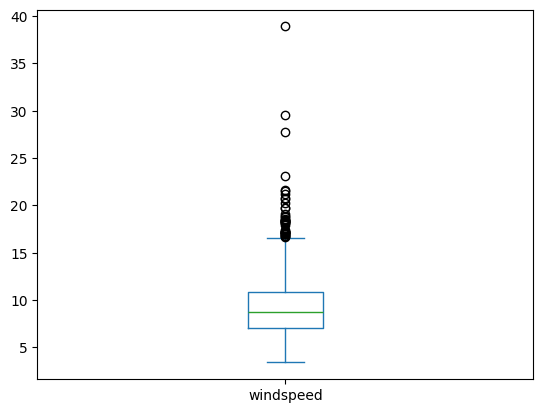

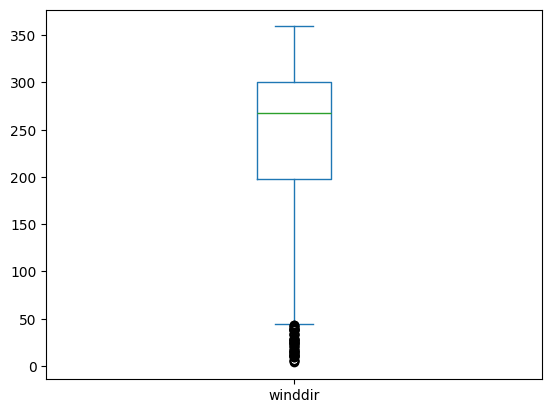

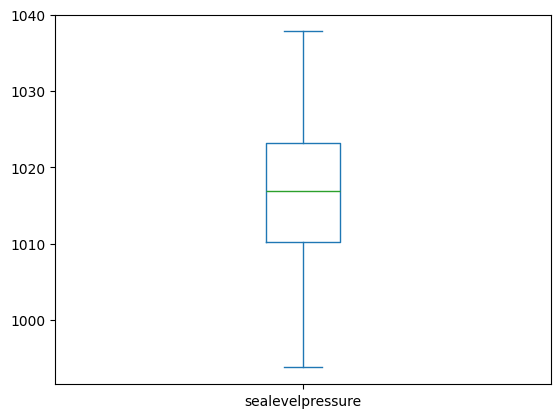

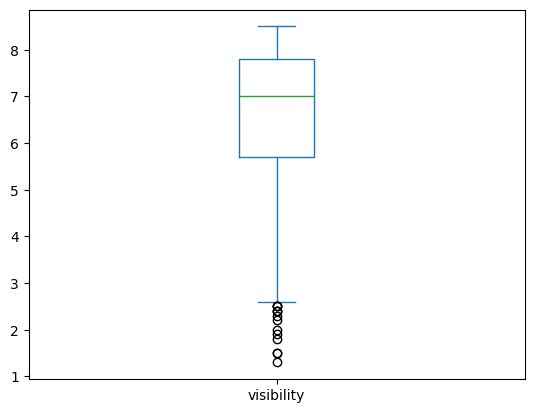

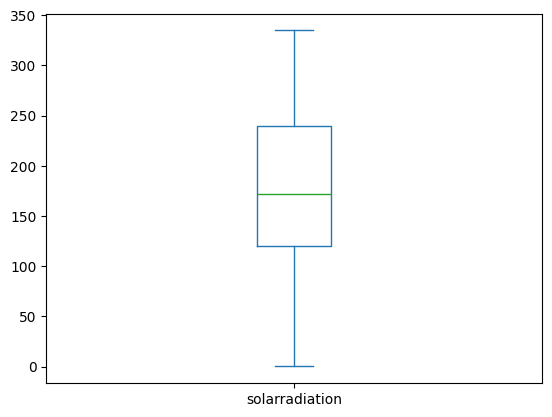

In [8]:
weather_df['windspeed'].plot(kind='box')
plt.show()

weather_df['winddir'].plot(kind='box')
plt.show()

weather_df['sealevelpressure'].plot(kind='box')
plt.show()

weather_df['visibility'].plot(kind='box')
plt.show()

weather_df['solarradiation'].plot(kind='box')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# windspeed (RobustScaler)
robust_scaler_ws = RobustScaler()
weather_df["windspeed"] = robust_scaler_ws.fit_transform(
    weather_df[["windspeed"]]
)

# winddir (sin/cos 변환 후 StandardScaler)
weather_df["winddir_sin"] = np.sin(np.deg2rad(weather_df["winddir"]))
weather_df["winddir_cos"] = np.cos(np.deg2rad(weather_df["winddir"]))

weather_df = weather_df.drop(columns=["winddir"])

std_scaler_wd = StandardScaler()
weather_df[["winddir_sin", "winddir_cos"]] = std_scaler_wd.fit_transform(
    weather_df[["winddir_sin", "winddir_cos"]]
)

# sealevelpressure (StandardScaler)
std_scaler_sp = StandardScaler()
weather_df["sealevelpressure"] = std_scaler_sp.fit_transform(
    weather_df[["sealevelpressure"]]
)

# visibility (RobustScaler)
robust_scaler_vis = RobustScaler()
weather_df["visibility"] = robust_scaler_vis.fit_transform(
    weather_df[["visibility"]]
)

# solarradiation (log 변환 후 StandardScaler)
weather_df["solarradiation"] = np.log1p(weather_df["solarradiation"])

std_scaler_sr = StandardScaler()
weather_df["solarradiation"] = std_scaler_sr.fit_transform(
    weather_df[["solarradiation"]]
)

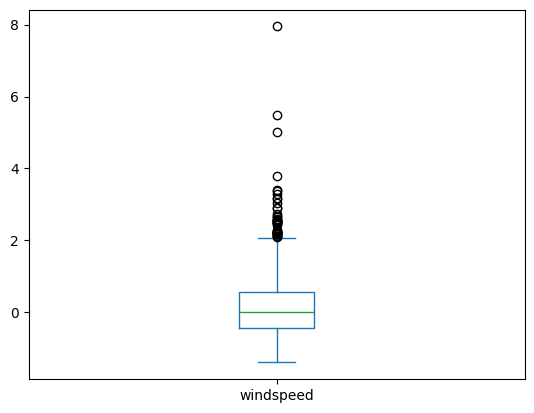

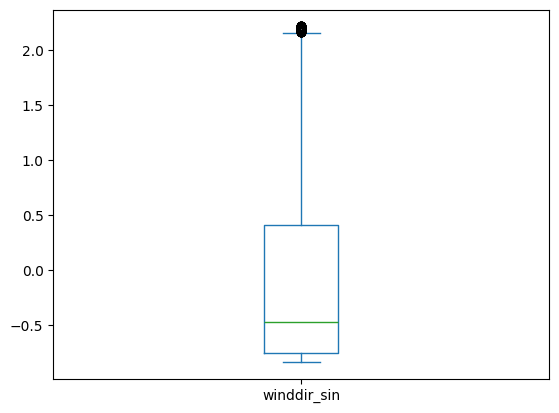

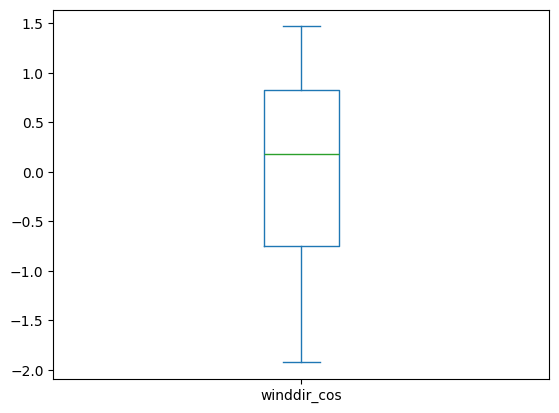

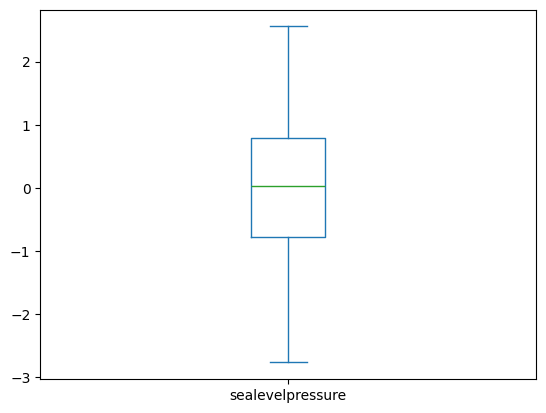

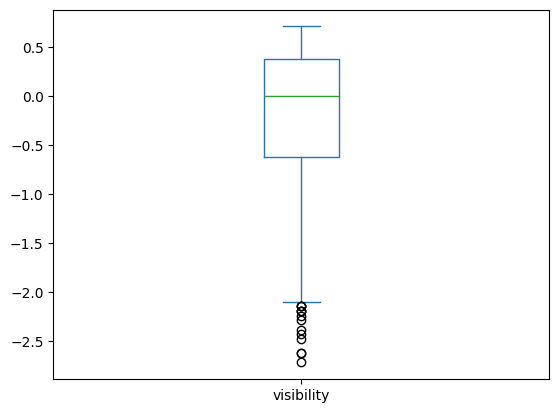

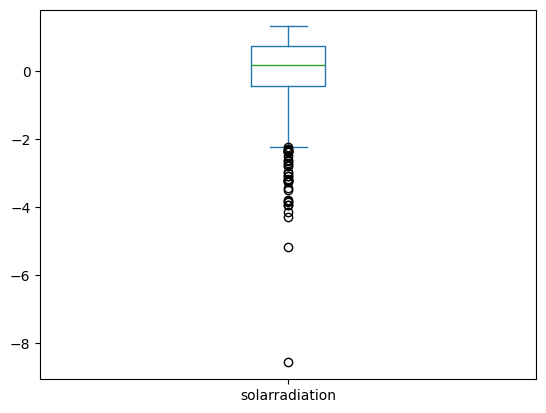

In [11]:
weather_df['windspeed'].plot(kind='box')
plt.show()

weather_df['winddir_sin'].plot(kind='box')
plt.show()

weather_df['winddir_cos'].plot(kind='box')
plt.show()

weather_df['sealevelpressure'].plot(kind='box')
plt.show()

weather_df['visibility'].plot(kind='box')
plt.show()

weather_df['solarradiation'].plot(kind='box')
plt.show()

In [12]:
weather_df.head()

,year,month,date,temp,humidity,precip,snow,windspeed,sealevelpressure,visibility,solarradiation,is_clear,is_rain,is_snow,is_overcast,is_cloudy,winddir_sin,winddir_cos
0,2017,1,1,36.9,72.0,0.000,0.0,-0.763158,1.382895,-2.095238,-0.948334,0,0,0,0,1,1.831050,-1.352596
1,2017,1,2,41.6,73.6,0.012,0.0,0.157895,0.717617,-2.476190,-1.077086,0,1,0,0,1,-0.764301,-0.739668
2,2017,1,3,34.5,63.6,0.000,0.0,0.368421,0.899056,-1.285714,-0.437971,1,0,0,0,0,-0.791042,0.180170
3,2017,1,4,37.3,60.1,0.000,0.0,0.394737,0.862768,-0.666667,-0.449377,0,0,0,0,1,-0.330885,1.032739
4,2017,1,5,38.0,53.5,0.000,0.0,1.026316,1.249839,0.047619,-1.372361,0,0,0,0,1,1.999294,0.643504


In [13]:
# windspeed
weather_df["windspeed_level"] = pd.qcut(
    weather_df["windspeed"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# visibility
weather_df["visibility_level"] = pd.qcut(
    weather_df["visibility"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# sealevelpressure
weather_df["sealevelpressure_level"] = pd.qcut(
    weather_df["sealevelpressure"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# winddir (sin/cos → 방향 세분화)
# 풍향은 sin/cos라서 따로 처리
# 각도로 다시 복원해서 구간화
weather_df["winddir_angle"] = np.rad2deg(
    np.arctan2(weather_df["winddir_sin"], weather_df["winddir_cos"])
)

weather_df["winddir_angle"] = (weather_df["winddir_angle"] + 360) % 360

weather_df["winddir_level"] = pd.cut(
    weather_df["winddir_angle"],
    bins=[0, 90, 180, 270, 360],
    labels=["NE", "SE", "SW", "NW"],
    include_lowest=True
)

# solarradiation
weather_df["solarradiation_level"] = pd.qcut(
    weather_df["solarradiation"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [15]:
weather_df = weather_df.drop(columns=["winddir_angle"])

weather_df.head()

,year,month,date,temp,humidity,precip,snow,windspeed,sealevelpressure,visibility,...,is_snow,is_overcast,is_cloudy,winddir_sin,winddir_cos,windspeed_level,visibility_level,sealevelpressure_level,winddir_level,solarradiation_level
0,2017,1,1,36.9,72.0,0.000,0.0,-0.763158,1.382895,-2.095238,...,0,0,1,1.831050,-1.352596,Low,Low,High,SE,Low
1,2017,1,2,41.6,73.6,0.012,0.0,0.157895,0.717617,-2.476190,...,0,0,1,-0.764301,-0.739668,Medium,Low,High,SW,Low
2,2017,1,3,34.5,63.6,0.000,0.0,0.368421,0.899056,-1.285714,...,0,0,0,-0.791042,0.180170,Medium,Low,High,NW,Low
3,2017,1,4,37.3,60.1,0.000,0.0,0.394737,0.862768,-0.666667,...,0,0,1,-0.330885,1.032739,High,Low,High,NW,Low
4,2017,1,5,38.0,53.5,0.000,0.0,1.026316,1.249839,0.047619,...,0,0,1,1.999294,0.643504,High,Medium,High,NE,Low


In [16]:
weather_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    1095 non-null   int64   
 1   month                   1095 non-null   int64   
 2   date                    1095 non-null   int64   
 3   temp                    1095 non-null   float64 
 4   humidity                1095 non-null   float64 
 5   precip                  1095 non-null   float64 
 6   snow                    1095 non-null   float64 
 7   windspeed               1095 non-null   float64 
 8   sealevelpressure        1095 non-null   float64 
 9   visibility              1095 non-null   float64 
 10  solarradiation          1095 non-null   float64 
 11  is_clear                1095 non-null   int64   
 12  is_rain                 1095 non-null   int64   
 13  is_snow                 1095 non-null   int64   
 14  is_overcast             1095 non-nu